<a href="https://colab.research.google.com/github/gaurav8trivedi12/gcp-vision-sanskrit/blob/main/GCP_Vision_Sanskrit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting text from images using Google Vision API
**Architecture**:
*   Google Drive to store images and the converted text in word documents
*   Google Vision API to extract text from the images

**Pre-requisites**:
*   Google Cloud Platform account
*   The above GCP account must have billing enabled
*   Vision API must be enabled
*   A GCP API credential

**How to use**:
1.   Create a folder in your home directory of google drive and name it for ex., **ocr**.
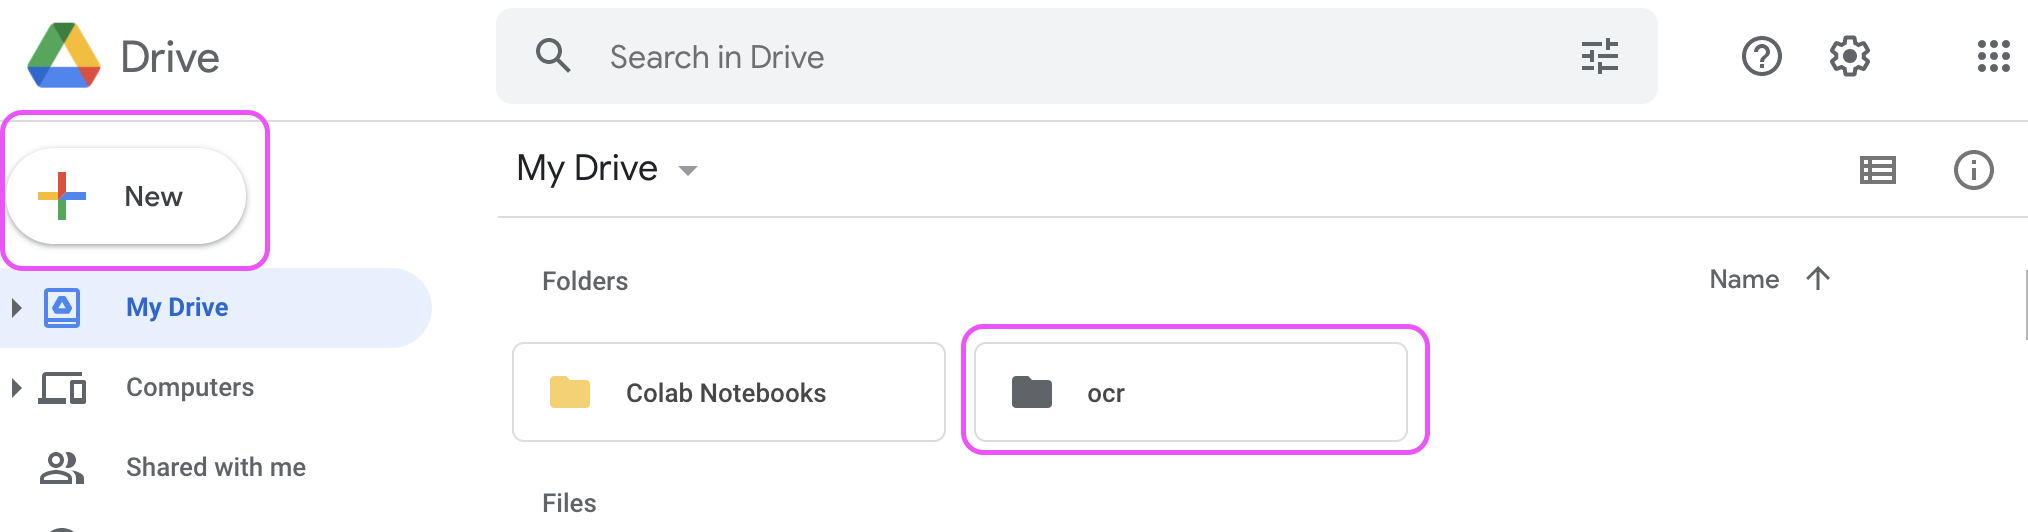
2.   Create 5 folders inside the above folder and let's name them as **images, pdf, text_from_images, text_from_pdf** and **temp**.
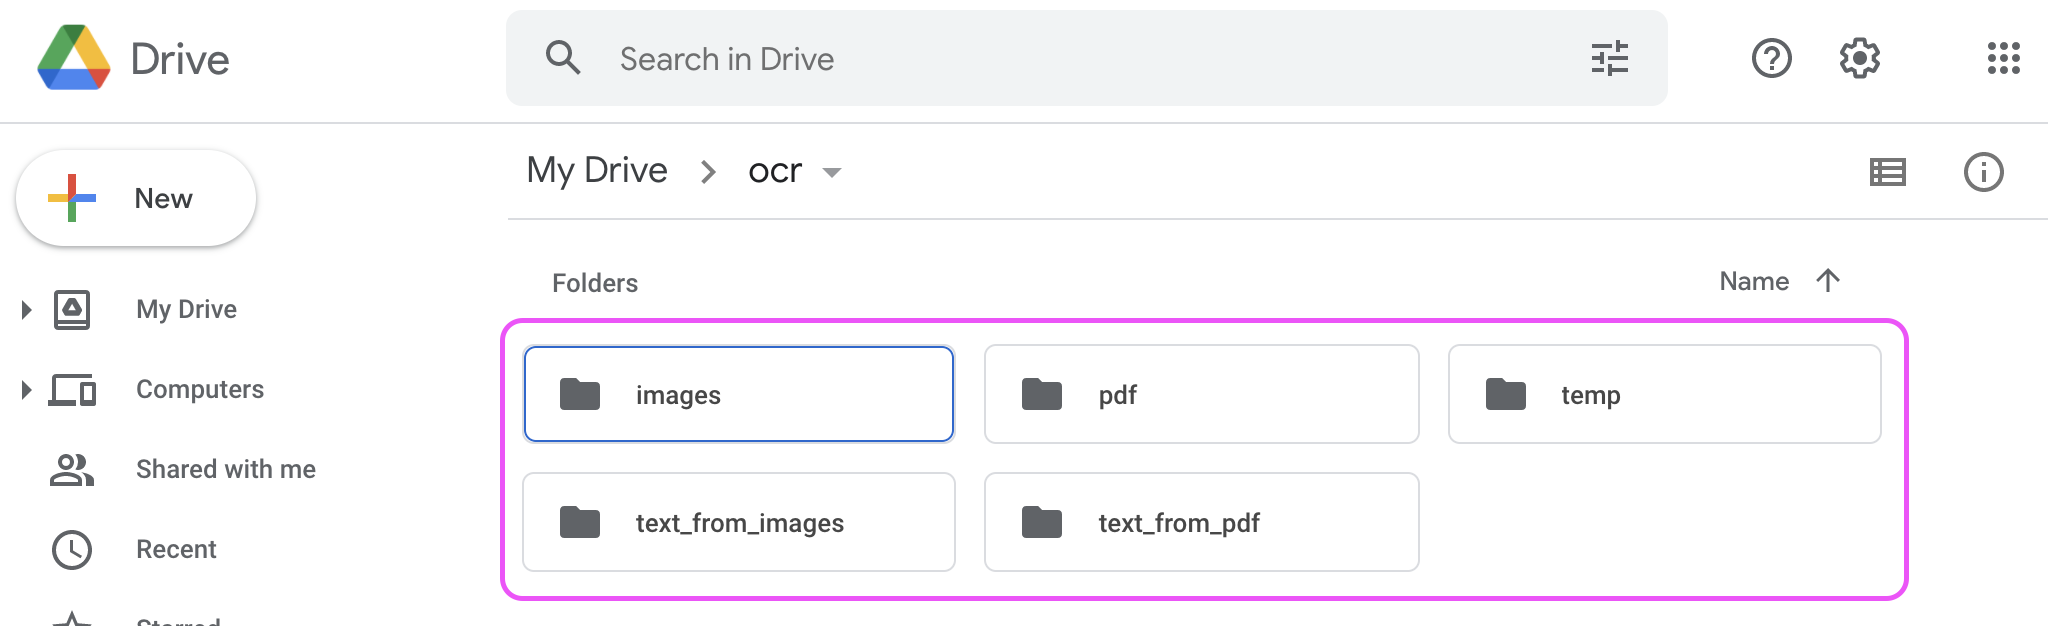
3. In **images** folder, only image type documents should be uploaded else the script will throw error.
4. In **pdf** folder, only pdf documents should be uploaded else the script will throw error.
5. Ensure that **temp** folder is empty before running the script.
6. The extracted text from images will be stored in **text_from_images** and those from pdf will be stored in **text_from_pdf**.
7. Once the setup is complete, you can upload the images in the images folder and then run each code cell.
8. Check the word document created in **text_from_images** folder.








In [ ]:
#@title Update Key and Folder names
#@markdown Do not share the API_KEY
Vision_API_KEY = "" #@param {type:"string"}

home_folder = "ocr" #@param {type:"string"}
image_folder = "images" #@param {type:"string"}
image_word_folder = "text_from_images" #@param {type:"string"}
pdf_folder = "pdf" #@param {type:"string"}
pdf_word_folder = "text_from_pdf" #@param {type:"string"}
temp = "temp" #@param {type:"string"}


In [ ]:
# installing libraries...
!pip install python-docx
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# connecting google drive...
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing packages...
# using the GCP API key

import pdf2image
from pdf2image import convert_from_path, convert_from_bytes
import os

import getpass
from googleapiclient.discovery import build
import base64
import glob
from docx import Document

APIKEY = API_KEY

my_drive = '/content/gdrive/MyDrive/'

#APIKEY = getpass.getpass()

# To extract text from images only run the code below
NOTE: Skip this code block in case of PDF conversion

In [ ]:
# this code is responsible for extracting text out of images

drive_path = my_drive + home_folder + '/' + image_folder + '/*'

#image_name = 'Sanskrit-Shloka.jpg'
#image = drive_path + image_name
#my_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAkGBxQTEhUUExQWFRUVFxwYGRcXFxweHhweIBwcIB0eHhoeHSggHyYlGxodIjEhJysrLjAuGx8zODMsNygtLiz/2wBDAQoKCg4NDhsQEBosJCAkNC8sLDQsLCwsLCw0NDIvLywsLCwsLCwsLCwsLzQ0Nyw0NCw0LC80LzQsNCwsNCwsLCz/wgARCACmAPQDASIAAhEBAxEB/8QAGgABAAMBAQEAAAAAAAAAAAAAAAQFBgMCAf/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/9oADAMBAAIQAxAAAAHcKqAaSL5ojSx6DuaRDz5o+2Snl75oORqmQ05IZGeX7K+i/k5TsaVR/C3iVMc1fTLdDSs7dnT3CmgHGtuByq7kVnSePECyFTInDOWUzqZ69+dSnlzRnrGX1K2RKEP1KEHlZiLFtBXyuwhTfPoAhw5NVF3SXmesnQ09bKtn0R7mVVkOPHqdbTOakp4fC5IE2q+FvE7ejn04fS1q5tcRJ3j0SUTgmi5e+azAD4fSAT3CKWJ8PvyFLIFly4nOX7+h8H1UzSS+cjsj9z6cDurepNfB949uJ2BR0+0jRyy+z42Y+y0fNY+a2sUxlhqPRj+tlZGJ28GzMJd3fsyvTTejFytP6MnG2g84rexijg630Yntr+RH7duSSwpWVsaVmPVmlZTut5IxWqJarrzSMv7NKyvYvJGJ1RMVdeaRmPRpWU7l5IxWpJXqHMAAAOEOzFLKsBUd7AUdr3HCHZikl2Aqe1gKO17jhDsxSS7AVHewFHa9xDmefQAABFhSK6Oc+stbO0ORTra2NJaHyXCmgAAAAAAAAAAAjkh8+gAqid3AARCWAAAAAAAACtpdR8OeY2EeMn91vqzJ+NN3WPmNlzTNd9JDWbTXNQluFAAAAAAAAAAAAAAAAAAAAAAAA//EACkQAAICAgEDBAICAwEAAAAAAAECAwQAERIQExQFICEiMkAVMCMxM1D/2gAIAQEAAQUC6w2A2SPoQWQ3WaYLiNvJH0IpAw93fHLr3Ri3AcRwfZy633IznJlbfFi5NmZhjK+7LaWK0xyzM2TzOmJM2RM5kFmTjxPFbTa2/IWXJ8hudln1M8gyqzlvUZ+OJybO8yRtaIIlbVaVy8JOk/PpLEDkdLQiXQs0dm3SDgw46bHjnLVENlmurZUAxYTzuRDEbYeguuz93B5z1t5cqh1kgDCOLTTRbxYfla30kgByGnpY4TzhUgJ+f9gjHSSIH2PED/ZrrYn455+Qy8gJuBs2frFLwMj6Hn5dn2EtgY1rlkVniR6kNdz6/wAiMnm5P3QC93QN3J5tlPUfhfUAcnl455f2hbeRWQMF7Gu6xJQckP2y3EWyNW1X/GeLg3qFInG/3Zj5LHDrLtI5frFsrpvIIgJLVcqDjVyA4/ySUNPZrAC5W20cJIqQ7ihhKtehLpDHqTsFk8PaVom5xwANG3zL+f8AURkVXXSavvI00P72T59kcp3M+hDK2+lqUjEOSb1DL7Y5nbI3PSUnUMu+sr6EszclZvZM+hnqiAiOCNhTiAR4U5X4guNTTd1fpHVGW4wMvQhMigXI6Q7jV1UGFeIgXTUk7njqFNT58Ydg0wQtVWZq652hx7H0NJO7Wr7CqCblX4igAy5+PTsDEXQlgDY6bHZHTsDJY+QYZVRhiwAG6Ccj3qSAHDGNxx6x03kUQUJHrBENyxhhjwA52hyCfMke8lgDZ2hlofX394cvf3hy9/eHLCffdl45DPI2RWJDkdlifNffkPyk5biZt3JuOQTyNkdiQ4llifMffkPyk5biZt3JeOQTyNkdiQ4lliTdffkPzkDbjZt2ffJEDgrfKUApSqATWOGsOVj08EaPKSIHEq4lAKy1QC1c4aw5WPTwRo8pIgcStiUApWqAWrHDWHKx6eCNHlZ/fZffNPxz+QXJrSNlS3yyWzo/yS4t9do4OBvv+tbiZsgiOQQspqflPCxZIGMMCsJa5Gh/0/eCfb9dphgPts3OLe0T/H6N3HkThXfazHJ0AjmZQVgHbuIgynGAk6/FmNVkoRbTF/H9F0BxYwOnZXcceg0YOeMOMkYIRdCaIMNYKq6xR9f/AEP/xAAWEQADAAAAAAAAAAAAAAAAAABBUHD/2gAIAQMBAT8BQiH/AP/EABYRAAMAAAAAAAAAAAAAAAAAAEFQcP/aAAgBAgEBPwFCYf8A/8QANxAAAQMCAwUDDAIDAQEAAAAAAQACESExEiJBAzJRYXEQgeETIDBCYnKRobHB0fBAUiMzUILx/9oACAEBAAY/Au2mnFSbBU+Yjtrrw7JUjz8OvmGtrr1o44SqeZHaIdGkRdbTPuezyVTM8kIJMOicPx1ThiLovkotnnv7PJTiiNYTI2gl3Ky3icJvgpKq4QYEwnnylGHRqo4iWzVikuuYFOcLerxhf7BOPDEc7otx2AO71/CaA45tSxFuO2uD6p8v3IIot/1C7dVXUABtxQzxOkJ8PFNcN6Jn+S4EZVAeHTwCcTtKB0UaoxUAmrYWYQU7o37+ZtAPW/CA5IEGxmNEUz2fwoOqb7J+y5oYvVqnSIG0qI6IOOgIVN4EGJXVDCAIdKJ0LQPqmDRhvyhGNb80RAmKKHIniAhxFk72k0atsVX5It0mQsR/rCqZ5p3Rv39LbsqAfMqAfT2J6I5XZbqYI6qjX1Nj/wDUcr20v+lCGvh2h+t1ME9EMrq2ohlfANf2VEOpx+SLcD+BWHC86jipwuvCmD01W674ISx8QafpQhrwSpLHLcdVbrw7T9lA4HVp3rddVTBPRCj7WgVTi5jzmPd80N+DaVAa46oZHVXS6b39gj4cVtsV+XRN6BA4Ac0l5TyIM6m45BbL99VEAxOq2dXUMQeiJpeZ1vZNw6ELbCZM37kMIjIfqELRiFf/AFPY+eAAA6pvun7JnCTahsblOpLpBnlITXXA9VNM5gCOKbxBn5lMB9pQDCZUkYDfSy2gBg4yoDndCng0yACNLrZwKyQfgjSOfFM7/SCtRrGnA9lDE3BEhAcP4APDzYfHIhEip4KHxW0doiKmKqqpE81BoR5pjCBMVVR8OzLE81wOo7aCVhbFpkqoB6fjzJ7BLQa3Oi2xDRS1OSEC4QBwNzRhDa96dlYOAwmTzWyyiv4Ry4o0WynZiprzojlaKxGEzE3lNwt3iBEft1tT5MUNAeiAc1m6bBAEVL/hm+kLDFOCdlFGivOU0YRun7JxGzDoeQo8nsxSdSpwAur9SiMLcQw7o/dFtIZFBEjqnZbYBbWarDFOCJ8kBLvhVRhG4T8wnf4ok6GyYHNri4WEWW0hrAG8qpsHDy4o9rvauoVfio4oezbsHIyoPZJnMc0j9ogeFFEHiC1Cbo80DqEY1MrooCoidSoPYeaxaxClDkZVdRCFLWR9Bh19Bh19Bh19CMzW9QnQ5uX2fFMzNz8vFOHlGU5eKaA4GTG4fysPlGUFaeKLg4UcLTFe9QRpveCGdreoToc3Kf6+KZmbn5Wp1Th5RmXl4oAOBkxuH6ysPlGUFaeKLg4UcLTr381BGm94IZmt6hOhzYaf6+KZmbn5W+acPKMy8vFABwMmNw/WVh8oygrTxRcHNo4WnXvUHhveCHvDzxOhkLaYrP8AwmYRa/FGgg1700aNdPcpgVuqcZjS6vSLITpULaYrPP2TC0bszxsjQQa96aNGunuUwK3WXjMaXV6RZCdDIW0xWefsmFo3b8bI0EGvemjRrp7lMCt1TjMaXV6RZD3h/wAax7hKs6nslD/YOEAqIMjkoh3c1Tmj3Soh0+6VSqI9kff+OIdFa9FtQDXiei2QcdD9FtPe+wQzEDWE5rb4nX6rMZycOaoI5Qj7o+p/nzyj+cB8fOHMx/CHHSTAQ9Z9v0aqVahmgJmefBMOaTh1K3YHFziPktmayS2anin6Q2lTU8ghzToZEOicR4poh2tp/KJBLTiNe/n2M9/7n+FBEqgHZMCeKA4KoQb/AFII7lB1ooUHsw6TPY33/wA/9H//xAAqEAACAgIBAgUEAwEBAAAAAAABEQAhMUFRYXEQgZGhsSDB4fAwQNFQ8f/aAAgBAQABPyHxJEM8gBB9D8wBiIDJj8MxaIS5R14jRayAAkk9hAgCMGAMTQ4DPoI0LH7kfWNqOoFHscH6A0EeLjvAzALgR8Y6wayBHT6ADOwRI74+PEKQzJQmYkYh1HlXlzKxeBuiYnD1DAGupBlQnBo0S49I30rJZjvqVntEIspYA4A9YgwggKFiy+qhgYwIGSic6YhLAqMBdA89YsWAKGjVPrFgIOEoi/eRlQ0tH7CFiQ1gMU285bhT1NnqhBkZFHRNXeIcvgQSDI28qlDOI3QI3zUO4HgNKs9YUAJQlDTvDmoOAZ92X2MIolAEQD1HHEgFQIYp29CANLipt21wLmfRVS7Q3zDsyQyRZxmFsDgBfvP3XPjQvWCCiPOY4DHNYF+cYmgHtGWArvk763GRkjkpqiRuHZ1z9kEYDAIiFlxn7hgPO4PJGzFlAvKxBpA2TyhSs1oLCqwaajKC162EfaGsbtoMgkgGruAGdBAAKD3shwXek9j/AKglGwxAsQAWyIFiMUPDuLHeaSARGIGganC4AHZwbqeyP7uHBaoF0pS9JY7gCgEIj1EdwxAYoqmsEehgpGFhTkE3Ehu8FP3XP8scIAA3jfPho45DgHiSBIDDH8gFtWd+NMkbkMQh8cFU+eJ5KA2iKgokdnC0hSOwWArrGN0WRlNHHoiZQD5PRfvGgiAIYYxpslzccBWV4N7gBcLAEt5cPRisRTYbuHoQLEMtLPM/bPlKnSn2NPPMIHYWrLF1aWQyhRBVkIk6lcIrQ3XPMQQC1lQtecS0oJT7ihEcdbwAXRnoYYAGcqGs71Eu6JiFyi8yKgVedfeDYnLwBoLBCOS0wPTYLeIAlmQoBg4OdxoC3AIX7wwQDaJsPmEXo/Z4DGYLLLsJR3MBMNCuKn6riEQI5oQCa6hfYQAEYCbCBYP3MH9eqELhhQaMKd5pIot0gACDqRsqlOFH8gGiUGmCwenEKIXsVOnGOIS0izuMnWXMlzWQaCMUTmWERXDwIVmCfjp4HsgswvkGE5jyIIhM/hCjGw335MwJRsCRE40aQhQWjwY2MghXGUZIwyQYcGFmjnp5xwCRHSNcRkhigit/eEhIghQMaoMd4Eg2UgoAzlRmoAjeerrmMC6EWXon6PT+NwI5ntwAHwBnv4EbogE6o4MVGi/oP657jwcfgCgDyK7F4MMEIFcjEgARk66gvfg53XDAenWvOEWAO0YTO00hiwjKANHqI/BxxiUEFiSq0amKIdSYP3jn4APaIXRXAY/AzGaoERDzVvKQAg5qOT+7/Y4/BujX++GmQahyX6RABtRdPnA4AABK2UJnCKIJI7PfbcRQKAnFGwKH4nmzVmRYimD2pVCZDByGIGHAcAs6DhuwCI0TsZpCfxEbSs4pxrcckBMAYDI5JgStQhX/AKFghorpXpDFFFTy68VqYqyUhQ3yCAjTA9o0RLZiPQsTHugJ4qflGcyk0AhgkWTf3QW0FUXsAesTKu0mADcWgaLj2gAkItsUQEcxVToLcGwiRAENQin1+YHASFhsyxOydQDq8y1bbQ9Jg8AJVJgJ8L5Hjwv/ACXxEAYAUxywiAyF1gjFgEfOH9JpfHh7YdClAEwGVcnT51DBAWIAEFJhUYHBsCF6Ja9oAJpYAM0QUQeoh9EX3gMCNWumJwqEDsV/kD1gXc5gUeSYM1CZPqSfvBPgDrXlBNUAPlj5mkDB9Cx7jwunAnuNwoaC8hIP2gAQZOYC7gd4+6gtiFpECc2xCkADNfI/g2mLSPzj+DeYtXfY4P8ABvMWkfnHgMZK19ZWKGriz0RmNsstdOODonOkHAKYdvktj0+8ZkVljuDQyzdZbUg7ZHYMKdQ3qZDZJQJeNsQxUB5yz0RgE00NroH5Tj7Jz5I0UTL53JNlVlj4DLN0htrFeuABbN8EJQYpXCZDZJQJeLPEPghq8s9EYBOmG1044Kyc9HGuiZfNsdqhGVWWN2KDiXLpDbWK9ccaN0EJQYcb1KjeSUG8Wcx/Zf11p8xG0CYV6IfhC4LaqfMJQc6WPylSSQeQ15Rq5zjjBEuEhCDdQ1BeTpLfLhUws/MjEQs+SD5EDqGRsyHncNTisxY/KURJB6viNXOccYIlgEIRbqGvWC8nSW+XCphfnEwkLHkg+0D6FgW2Fndw1OKzFj8oqJJh5CF5ONXOccYIlgkIRbqGvWC8nSW+XMf2X/fAc6L+sCMr5/hBcOq1d4xgmIL3PJIzP4QkmB+K1AOG7hHqJSUU2aAswgbq+hz2gFkA5BhrlMXn/XWmXAU4BJqwVsCsFAQGO7fgMdQDBQleoRTC6h+szhI4TaoddFmybyv7UFReK8LXMPQT/v8AYBKfPYIOzqMv6aIBHJhA7FI9n9TCr84/5/SEIEC2QzqRCCoFS2bGSQNBDCL4IfBRsQINOJSR5bYXE+IrEE2HvYmQR5Kr4Z+c1WYswNtxBIIEDcyCz3xFg6AlknXWOMQRHaw12MFc4IIgjfHkjgABiyAMV0V4e8f0kakHBDi5BBBDXgXLQIpfrB50AAH0mICuRBnS8wGIdAwPkMWBoKHOI8dPA1IMiV7b+fA+E5fP/R//2gAMAwEAAgADAAAAENKqMMEMNMEPOHNPPDLHDDFADBLPHLDPPF73AHDPDOBKBGH0PNMNNIPCPNONNMPIPM2zLFIIGOCpGJJB/N8fMMONPMMONNPPPHDHPDLHPPLHPFPPPF/9DvPPPPPPPPPPPLCIEEMOPPPPPPPPPAD09AwAfPPPPPPPPPPPPPPPPPPPPPPPPP/EACERAAIABgMAAwAAAAAAAAAAAAABEBEgITFBQJHwMGGh/9oACAEDAQE/EDUxwdU69SHRv5DNDyP3Zuljz2O3voXD1IZqD92brWRQkT56zH34b5qsLFxZuKylB45X/8QAIhEAAgEDAwUBAAAAAAAAAAAAAAERECAxIUBBMFFhkfDh/9oACAECAQE/EJI1gVvmvi+dZt46TwRgI5os/dpOKKqFj0LUeya0G9ZEczRfejKu4+7jHSSLIFunizjeseXA8DzNPzdf/8QAKhABAQACAgICAgEFAAIDAAAAAREAITFBUWFxgRCRoSAwQLHwUNHB4fH/2gAIAQEAAT8Q/LrHqVcUApemsG8gjoOcTSSFcHAEVeTX5ebunKFgCuhfgxG6FGJ+x2PrDCQ1G+jY/WHKBnCInImxPD/W5pCUBabvNJyDrf8AQgaANNlKPhreWnDBBexKfQTPeel/D4fT/Q8jr8AVX3X6/J8AAWQlI0LrOI1qfs/TxgZgwgaBkFsbvOZsk6vI0CcSM9ZKgu67oZvpLLKZ0wAQobeQUNejHQEhUa8PPtcnwAqQizbkDfnGvRgQiw3ukoJyYDsWkhsB85wiWpg0mNK3UDlYhmxVgTRCHtqF50GQgiXuUa0PonvANAKrAG7d5o1zi7cQO7oG/B6bwEySb2gk8D+WcRpRYEa5P4NwVAmoMgdAAb7fGBVJQkpaHhtEyeOQXk/WPb1jc0g3Ay8JMrjlCCSXpJSPjBW+Rdkojpx3gyvAQaa8ha+MToIK2wIJg8OxiMwIQF0WCAUqpDA0V4FIctDXOG6U2WFY6HJHj+hiCLFVBEjBsozCZg+alKRLXtfeNGVicUA/6wheSIcF6IQdM9baGhHTRxhWI1vnRiaNjPmvX7cCYojhEiZ0lSgjtKaj6M6uBBJX0QouFiWd5pmuX2RJsZs7xQUGp0DbQX/8DlROkXZb0U2POHhm2mLeXEU7vdwlmix8Jw9YpwrpuEjkEWHHWNeHyBsN9J/HFfSLJtcahlNIHesZEAMoFwOwOhdaRMXFKpLmkedYQUgOzoEpuPZw45SSZySP/kyaxBlBiIngKP75MY6AYOw19Vyay15QsaekonhwMgCVEvBBi9ejAjGJ/PRewv1lAV8vkovSNnXG8FuuqCRVCGtGvr+8x6k5gDa6eac/iCdIlHxTAAAgaA/PIjEKnwpr+4JEQB7IWD8V/f5MojkSKgDUdrgv+bS/u1c1EzsAIgiAum5VjIe8haVdThH1ig4iXMaArRvWQC/EEgqIwacOnk25hWtQi+lDXzjxk29gBUOmh5nGPS1qWWF4ARwpMAoNQCluxsxDfgtzbDIglAEFNRo4vpJyAMRahSK3c3jpkj4TAjbaDxlcChdTtJNPfPGb+sCY5IDsIlP9Yw6QiR7RoA8LynPUY0AaIUFGi9PvLAuhXUoHHdB95F24LxlZ8d4JydsAgleQEEfOsAAaCpbCHbnk8Ywoo9q59zI8PbEoCq1P4yFiHUHLa5HZiLlBrSEQOCM7OXJgY6IpW4EDUV9GOwjco3i6pDMktdN2gqHx84G9mrtFAdMwwFNk6YZfj8BWg1xJsCgAHRuTJ0K4KAuK2+L2mf8AQ8cG/FgD6FpcuwPIzUASMCRaLFHytOLWMFrOPJ4x4BRCPQ03z4wDhMMbtoFrwq6csrabaPAB41Dg3jbOhIBQPIvRyHESh2ZXKjRxjejtjZCV03knBZEGxJ2xXB1XDSRoy8bP9YnQXRPKApvXOFXeMvGRs1b385ubnhYu4FSTUytkHM9ZV8Z6vdyNwfAVQENsXZynHEQrtkto0WkFW6bicos0S+Sxrrq4AghRNEl62y+McX0qSB3dOFPHFzjJhA0HEb1u3jFRMgU85daGvvJqSGsNVop1Ldd4zFpGIkbFyX3jEjmpTdVyLR7HONrIAs5Q1nG8/wCD1/tmhwEZ7JglArD6Khp6bj6cdckaFCQxoDYzXGAqUALywnX+Bsmdc50c+vwjJ8mDg6io1T4NobNo747q7tJ2Bo+3AtahUThbANjYl8YuT5MCBs07NFF5bAPYxRRDpQvp1rN46ezb3N8ZoSLYA8O7R43sRPmfJlyfJk+TGp/7etLApGG9TEK8C/7qgfSfbk+TLW3WDa3uuxq5SmvYvwPYmx7HJ8mXFzyRIUUFrrQ36xRId0QEBAre7P3g4aMuE+en2L4yfJk+TBzxwNWcg5+/xcIRQFAi8JE7YY0UbSaKodhyP3gDkIQSy+2ZBpTQGk4YUbppliBALpYIIqXpVwIGy8XBu/O95s5OuvRBdHHxmkumkUYg1O9+MvrlFhB0A2akZziEoUC+FZIBERQdt5obICfNplKo8ZtEmmQ6lzvSTvGxxI0uG5P5R1zAQGWeBz/LcxuIFB3uaAq99BMOTVgxRlTyV/eECSCTvAWBvGMgRAxBAALS7+TAqVGkQSeWQa8d6wxsSxAnsQTmMcYdWMmxnYAY33MUQlWSECgukFNNxT2uIiGunhf94nY0XRd7USTvCnZ6lEmPzFL7yzgKGAS2GFNRwMCwZmEyAbvps0ZJO0V1rAGl1txkhwAZaFErOdec/lfjJce40hrvw+MBSRC8wIX9ZKRtADKiRecKWoL0I7+MYtt83vv52/GxRLmOkSA8Rde8GqxsY6RN/IZRwAL0R/7YaxhGG2GgB293nOUoYkCL4CJ4MbgZtJIW+40njGIQRk9N6r3kBABZLVXinnFJGtX2KfTNUJuTeDT1qzEnWgGJ534TSdmGxQiFvO/VWLbNjfR9Or4NYBRqV0l8PtkgLwDNkn6PwKAxkGCokeaFe4YiFhW6oNead/OHBBNHSnDOLNXxMrC0oM0EPnS4AQ7rpTz8dPVfOKOEimhAY+wMZkmgFf7E7mVBBT0ivgf7CAcqDBHOwoG4N0/2EA5UEFO4in0N/E2FIK8rwfL/AFwpq7LqmjIXzyZUPMce/MZ4waBZttSHvzOsHrJrKoII2MfTGGZF8CtPQ4HODKGSoTSIOG4Kn0AIHSSEpD73gYRAoqIlKJDbjSUoCPwHrqZeLh05s2Z0+sKkWJbRb9+J1hwMFIbKCI4SfZkjIX7GouhwOPNAJKx2D4V9YU/WhetmOwjjnbgQIlJqLVISN3HkWoEfgPWViwdMhrZm2fWHyLAtpz9/HWB0wUhsiCOX8jICQvwKUfAD3es7CFJWIoY4r6wYdNQtGwJyIfe8KBkpFdEpDW7f7ET7sg3YO/8A6wyDlFuAV8NKOEUiyALCQFU/nGaUOjgCjOOXpvnXZj27SFHmpeyZKddBLQ1Jz0nenppAa1fKBYNqXmzqZWeqDjW3bwkJOsv0rLJCfqPGBCjIPba8JT9YcCgoAgKgVRgmUIGgCjOAWdN86mYk1YoNEnNS9gd5KTRBLRvJz0nenrZgTS5LDwbU7WLqZceqDjXvbxNSZfpUWSE+yPGCotNHkofCP+mCRqsAVBAK0vzgEUIFEFGcDfpvnVBN1WM3DzEvYeclOsAS0byc9J3p62QOKLlhQHKaWhdTK3Wjzvl4mpP/AAEUUNgPScP9b4j1EIk5Qznv3jUnVCdK9Na3ijgAfqqUj7HnCSAzU4BFXSUPyy2HBu7eiX1jzyRthQLNR1hIAACUTBU1XfGnN44SJKMSnhJiKEg6Cmv2B+v8eBLF3ncDHZyYyc++1PLqnWDyCylg0leHxhdvhibOuudLsfY/WbZjsW3lZFN4iAchhJTk1/8AZllNexor8ju93/J+BiPHHGH8vwGRbN+fwpeSN3U3/vX+QLeyhQVQXVq9y4QA0QR8jxly5cuDRCLSIgrp7WDDQ4OXLl/B0ewlNIN/73/hMshTHDhO9VB8YKR3JlJo4i1tAi3DhRbLKFOyCMeLiuhQNpwphnC9ehL+5zQwvVoHlzUCg2pUg41NEqYj1LhID7jj4d06o1FQpsfwcBTyUioFqXrKJZDrKl7EO+8Ibls14dlCp1TNr9FaEaIae2B/h6H6LyIP06zwhQSeBDR6/DoxwCMSJpcGpwwPo/OslqfBBT4vGCF2g3YC9nWHoRRm4Ix5NOBaIQvMCZRAUV0ahH9hiFFBThmz4wDh8S5d5GYCZE7BEjo5n1s37/8AI//Z'
#with open(image, "rb") as img_file:
#    my_string = base64.b64encode(img_file.read())
#print(my_string)

try:
  actual_path = drive_path[:-1]

  #creating a Word document
  document = Document()

# for each image present in the images/ folder

  for image in glob.glob(drive_path):
    my_string = ""
    filename = image.split("/" + image_folder + "/")[1]
    print('Converting the image: ' + filename)

    #function to create base64 string of the image
    #because drive_path does not work in vision JSON object
    
    def encode_image():
      with open(image, "rb") as img_file:
        my_string = base64.b64encode(img_file.read())
        my_string = my_string.decode()
      #print(my_string)
      return my_string

    #IMAGE="https://haribhakt.com/wp-content/uploads/2015/08/Sanskrit-Shloka.jpg"
    IMAGE = encode_image()
    vservice = build('vision', 'v1', developerKey=APIKEY)
    request = vservice.images().annotate(body={
            'requests': [{
                    'image': {
                        'content': IMAGE
                    },
                    'features': [{
                        'type': 'TEXT_DETECTION',
                        'maxResults': 3,
                    }]
                }],
            })
    responses = request.execute(num_retries=3)
    
    converted_text = (responses['responses'][0]['textAnnotations'][0]['description'])
    #print(converted_text)
    #print('\n ############## \n')
    converted_text += ' \n ############## \n '

    document.add_paragraph(filename)
    document.add_paragraph(converted_text)
    print('Conversion completed for image: ' + filename)

  document.save(my_drive + home_folder + '/' + image_word_folder + '/text_from_images' + '.doc')
  print('All images converted, check the word document in ' + home_folder + '/' + image_word_folder + ' folder')

# all images/ converted

except:
  print('Oops, an error occured! Filename: ' + filename)

#print(responses)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAkGBxQTEhUUExQWFRUVFxwYGRcXFxweHhweIBwcIB0eHhoeHSggHyYlGxodIjEhJysrLjAuGx8zODMsNygtLiz/2wBDAQoKCg4NDhsQEBosJCAkNC8sLDQsLCwsLCw0NDIvLywsLCwsLCwsLCwsLzQ0Nyw0NCw0LC80LzQsNCwsNCwsLCz/wgARCACmAPQDASIAAhEBAxEB/8QAGgABAAMBAQEAAAAAAAAAAAAAAAQFBgMCAf/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/9oADAMBAAIQAxAAAAHcKqAaSL5ojSx6DuaRDz5o+2Snl75oORqmQ05IZGeX7K+i/k5TsaVR/C3iVMc1fTLdDSs7dnT3CmgHGtuByq7kVnSePECyFTInDOWUzqZ69+dSnlzRnrGX1K2RKEP1KEHlZiLFtBXyuwhTfPoAhw5NVF3SXmesnQ09bKtn0R7mVVkOPHqdbTOakp4fC5IE2q+FvE7ejn04fS1q5tcRJ3j0SUTgmi5e+azAD4fSAT3CKWJ8PvyFLIFly4nOX7+h8H1UzSS+cjsj9z6cDurepNfB949uJ2BR0+0jRyy+z42Y+y0fNY+a2sUxlhqPRj+tlZGJ28GzMJd3fsyvTTejFytP6MnG2g84rexijg630Yntr+RH7duSSwpWVsaVmPVmlZTut5IxWqJarrzSMv7NKyvYvJGJ1RMVdeaRmPRpWU7l5IxWpJXqHMAAAOEOzFLKsBUd7AUdr3HCHZikl2Aqe1gKO17jhDsxSS7AVHewFHa9xDmefQAABFhSK6Oc+stbO0ORTra2NJaHyXCmgAAAAAAAAAAAjkh8+gAqid3AARCWAAAAAAAACtpdR8OeY2EeMn91vqzJ+NN3WPmNlzTNd9JDWbTXNQluFAAAAAAAAAAAAAAAAAAAAAAAA//EACkQAAICAgEDBAICAwEAAAAAAAECAwQAERIQExQFICEi

# To extract text from pdf only run the code below
NOTE: Skip this code block in case of IMAGE conversion

In [ ]:
# pdf to image and then image to google vision

drive_path = my_drive + home_folder + '/' + pdf_folder + '/*'

temp_images = my_drive + home_folder + '/' + temp + '/*'

# temp dir cleanup before converting pdf
for img in glob.glob(temp_images):
  os.remove(img)


try:
    
  for pdf in glob.glob(drive_path):
    #print(pdf)
    actual_path = drive_path[:-1]
    filename = pdf.split('/' + pdf_folder + '/')[1]
    filename = filename.split('.')[0]
    print('Converting the pdf: ' + filename)

    pages = convert_from_path(pdf)
    i = 0 
    for page in pages:
      i+=1
      page.save(my_drive + home_folder + '/' + temp + '/' + filename + str(i) + '.jpg','JPEG')

    #creating a Word document
    document = Document()

  # for each image present in the images/ folder

    for j in range(1,i+1):
      image = my_drive + home_folder + '/' + temp + '/' + filename + str(j) + '.jpg'

    #for image in pages:
      my_string = ""

      #function to create base64 string of the image
      #because drive_path does not work in vision JSON object
      
      def encode_image():
        with open(image, "rb") as img_file:
          my_string = base64.b64encode(img_file.read())
          my_string = my_string.decode()
        #print(my_string)
        return my_string

      #IMAGE="https://haribhakt.com/wp-content/uploads/2015/08/Sanskrit-Shloka.jpg"
      IMAGE = encode_image()
      vservice = build('vision', 'v1', developerKey=APIKEY)
      request = vservice.images().annotate(body={
              'requests': [{
                      'image': {
                          'content': IMAGE
                      },
                      'features': [{
                          'type': 'TEXT_DETECTION',
                      }]
                  }],
              })
      responses = request.execute(num_retries=3)

      #print(responses)

      if not responses['responses'][0]:
        #empty response due to a blank page in pdf
        converted_text = ' '
      else:
        converted_text = (responses['responses'][0]['textAnnotations'][0]['description'])

      document.add_paragraph(converted_text)

    document.save(my_drive + home_folder + '/' + pdf_word_folder + '/' + filename + '.doc')

    i = 0 
    for page in pages:
      i+=1
      os.remove(my_drive + home_folder + '/' + temp + '/' +filename+str(i)+'.jpg')
    
    print('Conversion completed for pdf: ' + filename)

  # all images/ converted
except:
  print('Oops, an error occured! Filename: ' + filename)


Converting the pdf: ex_206-220
Conversion completed for pdf: ex_206-220
